# Missing data and aggregations
- in the real world there will be missing data and or unwanted disturbance

## setup

In [16]:
import numpy as np
import pandas as pd

np.random.seed(42)
n =10
# creat dummy data
random_matrix = np.random.randint(1,10,[n,n]) #2d array
index = np.random.choice(random_matrix.size, 10, replace= False)
print(index)
random_matrix = random_matrix * 1.0
random_matrix.ravel()[index] = None
print(random_matrix)




[ 9 84  6 39 92 33 68 85 20 17]
[[ 7.  4.  8.  5.  7.  3. nan  8.  5. nan]
 [ 8.  8.  3.  6.  5.  2.  8. nan  2.  5.]
 [nan  6.  9.  1.  3.  7.  4.  9.  3.  5.]
 [ 3.  7.  5. nan  7.  2.  4.  9.  2. nan]
 [ 5.  2.  4.  7.  8.  3.  1.  4.  2.  8.]
 [ 4.  2.  6.  6.  4.  6.  2.  2.  4.  8.]
 [ 7.  9.  8.  5.  2.  5.  8.  9. nan  1.]
 [ 9.  7.  9.  8.  1.  8.  8.  3.  1.  8.]
 [ 3.  3.  1.  5. nan nan  7.  9.  8.  2.]
 [ 1.  7. nan  8.  5.  3.  8.  6.  3.  1.]]


In [21]:
scores = pd.DataFrame(random_matrix, index=[f"Player{i}" for i in range (1,n+1)],
                                    columns= [f"Raound {i}"for i in range (1,n+1)])
scores


,Raound 1,Raound 2,Raound 3,Raound 4,Raound 5,Raound 6,Raound 7,Raound 8,Raound 9,Raound 10
Player1,7.0,4.0,8.0,5.0,7.0,3.0,NaN,8.0,5.0,NaN
Player2,8.0,8.0,3.0,6.0,5.0,2.0,8.0,NaN,2.0,5.0
Player3,NaN,6.0,9.0,1.0,3.0,7.0,4.0,9.0,3.0,5.0
Player4,3.0,7.0,5.0,NaN,7.0,2.0,4.0,9.0,2.0,NaN
Player5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0
Player6,4.0,2.0,6.0,6.0,4.0,6.0,2.0,2.0,4.0,8.0
Player7,7.0,9.0,8.0,5.0,2.0,5.0,8.0,9.0,NaN,1.0
Player8,9.0,7.0,9.0,8.0,1.0,8.0,8.0,3.0,1.0,8.0
Player9,3.0,3.0,1.0,5.0,NaN,NaN,7.0,9.0,8.0,2.0
Player10,1.0,7.0,NaN,8.0,5.0,3.0,8.0,6.0,3.0,1.0


In [20]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Player1 to Player10
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9 non-null      float64
 1   1       10 non-null     float64
 2   2       9 non-null      float64
 3   3       9 non-null      float64
 4   4       9 non-null      float64
 5   5       9 non-null      float64
 6   6       9 non-null      float64
 7   7       9 non-null      float64
 8   8       9 non-null      float64
 9   9       8 non-null      float64
dtypes: float64(10)
memory usage: 880.0+ bytes


## Missing value methods
- isnull() - returns True if null
- notnull() - retunrs True if not null
- dropna() - drops an axis with nulls
- fillna() - fills the null values with certain value

In [22]:
scores.isnull()

,Raound 1,Raound 2,Raound 3,Raound 4,Raound 5,Raound 6,Raound 7,Raound 8,Raound 9,Raound 10
Player1,False,False,False,False,False,False,True,False,False,True
Player2,False,False,False,False,False,False,False,True,False,False
Player3,True,False,False,False,False,False,False,False,False,False
Player4,False,False,False,True,False,False,False,False,False,True
Player5,False,False,False,False,False,False,False,False,False,False
Player6,False,False,False,False,False,False,False,False,False,False
Player7,False,False,False,False,False,False,False,False,True,False
Player8,False,False,False,False,False,False,False,False,False,False
Player9,False,False,False,False,True,True,False,False,False,False
Player10,False,False,True,False,False,False,False,False,False,False


In [23]:
scores.notnull()

,Raound 1,Raound 2,Raound 3,Raound 4,Raound 5,Raound 6,Raound 7,Raound 8,Raound 9,Raound 10
Player1,True,True,True,True,True,True,False,True,True,False
Player2,True,True,True,True,True,True,True,False,True,True
Player3,False,True,True,True,True,True,True,True,True,True
Player4,True,True,True,False,True,True,True,True,True,False
Player5,True,True,True,True,True,True,True,True,True,True
Player6,True,True,True,True,True,True,True,True,True,True
Player7,True,True,True,True,True,True,True,True,False,True
Player8,True,True,True,True,True,True,True,True,True,True
Player9,True,True,True,True,False,False,True,True,True,True
Player10,True,True,False,True,True,True,True,True,True,True


In [24]:
scores.dropna()

,Raound 1,Raound 2,Raound 3,Raound 4,Raound 5,Raound 6,Raound 7,Raound 8,Raound 9,Raound 10
Player5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0
Player6,4.0,2.0,6.0,6.0,4.0,6.0,2.0,2.0,4.0,8.0
Player8,9.0,7.0,9.0,8.0,1.0,8.0,8.0,3.0,1.0,8.0


In [27]:
scores.dropna(axis="columns")

,Raound 2
Player1,4.0
Player2,8.0
Player3,6.0
Player4,7.0
Player5,2.0
Player6,2.0
Player7,9.0
Player8,7.0
Player9,3.0
Player10,7.0


In [28]:
#how to treat NaNs?
#depends on the situations
#many times need to talk to domains experts
scores.fillna(0) # in this case - may be reasonable to give 0 scores for missing value

,Raound 1,Raound 2,Raound 3,Raound 4,Raound 5,Raound 6,Raound 7,Raound 8,Raound 9,Raound 10
Player1,7.0,4.0,8.0,5.0,7.0,3.0,0.0,8.0,5.0,0.0
Player2,8.0,8.0,3.0,6.0,5.0,2.0,8.0,0.0,2.0,5.0
Player3,0.0,6.0,9.0,1.0,3.0,7.0,4.0,9.0,3.0,5.0
Player4,3.0,7.0,5.0,0.0,7.0,2.0,4.0,9.0,2.0,0.0
Player5,5.0,2.0,4.0,7.0,8.0,3.0,1.0,4.0,2.0,8.0
Player6,4.0,2.0,6.0,6.0,4.0,6.0,2.0,2.0,4.0,8.0
Player7,7.0,9.0,8.0,5.0,2.0,5.0,8.0,9.0,0.0,1.0
Player8,9.0,7.0,9.0,8.0,1.0,8.0,8.0,3.0,1.0,8.0
Player9,3.0,3.0,1.0,5.0,0.0,0.0,7.0,9.0,8.0,2.0
Player10,1.0,7.0,0.0,8.0,5.0,3.0,8.0,6.0,3.0,1.0


## Missing  value strategy
strategy depends on:
- dataset size
- valuable information (some rows, some columns)
- percentage missing values
- domain knowledge
- missing values can impact
    - data visualization
    - artihmetic computations
    - summary statistics
    - machine learning algorithms

In [31]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [32]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

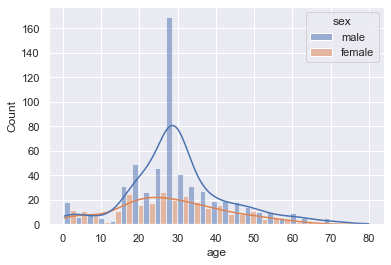

In [53]:
#focus on age

sns.histplot(data = titanic, x="age", kde = True, hue = "sex", multiple="dodge")
sns.set_theme()



In [49]:
#talked to a titanic historian(not real)
#this dude says: use median age of corresponding gender to fill in age

print(f"male: {np.sum(titanic['sex'] == 'male')}")#detta är inte en df utan en bool
print(f"females: {np.sum(titanic['sex'] == 'female')}")#detta är inte en df utan en bool

median_male_age=titanic.loc[titanic["sex"] == "male", "age"].median()
median_female_age=titanic.loc[titanic["sex"] == "female", "age"].median()

median_female_age, median_male_age



male: 577
females: 314


(27.0, 29.0)

In [52]:
titanic.loc[titanic["sex"]=="male", "age"] = titanic.loc[titanic["sex"]=="male", "age"].fillna(median_male_age)
titanic.loc[titanic["age"]==29, "sex"].value_counts()

male      137
female      7
Name: sex, dtype: int64

In [54]:
titanic.isnull().sum()["age"]

53

In [55]:
titanic.loc[titanic["sex"]=="female", "age"]=titanic.loc[titanic["sex"]=="female","age"].fillna(median_female_age)
titanic.loc[titanic["age"]==27, "sex"].value_counts()

female    59
male      12
Name: sex, dtype: int64

In [56]:
titanic.isnull().sum().age

0

<AxesSubplot:xlabel='age', ylabel='Count'>

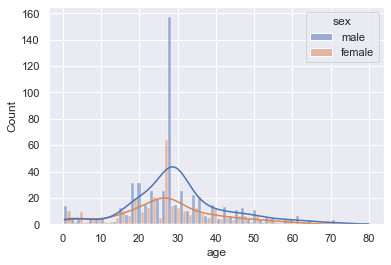

In [62]:
sns.histplot(data = titanic, x= "age", kde = True, multiple="dodge", hue = "sex", bins = 50)

In [59]:
#groupby
titanic.groupby("sex").mean()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.761146,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.355581,0.429809,0.235702,25.523893,0.930676,0.712305


In [60]:
titanic.groupby("sex").median()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,1.0,2.0,27.0,0.0,0.0,23.0,0.0,0.0
male,0.0,3.0,29.0,0.0,0.0,10.5,1.0,1.0


In [61]:
titanic.groupby("sex")["age"].max()

sex
female    63.0
male      80.0
Name: age, dtype: float64

In [63]:
titanic.groupby("sex").mean()[["survived", "age"]]

,survived,age
sex,,
female,0.742038,27.761146
male,0.188908,30.355581
